<a href="https://colab.research.google.com/github/nitinpatil301a/Tensorflow-Keras-Work/blob/master/breast_cancer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%tensorflow_version 2.0.0
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [0]:
data=load_breast_cancer()

In [0]:
df=pd.DataFrame(data=data.data,columns=data.feature_names)

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [7]:
y=pd.DataFrame(data.target,columns=["target"])
df.shape,y.shape

((569, 30), (569, 1))

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [0]:
df=sc.fit_transform(df,y)


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,y.values,test_size=0.1)
x_train.shape,y_train.shape

((512, 30), (512, 1))

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [0]:
model= Sequential()
model.add(Dense(30, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [0]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [14]:
history=model.fit(x_train,y_train,batch_size=10,epochs=100,validation_split=0.1)

Train on 460 samples, validate on 52 samples
Epoch 1/100
460/460 [==============================] - 2s 5ms/sample - loss: 0.4790 - accuracy: 0.8500 - val_loss: 0.3335 - val_accuracy: 0.9038
Epoch 2/100
460/460 [==============================] - 0s 400us/sample - loss: 0.2036 - accuracy: 0.9391 - val_loss: 0.1637 - val_accuracy: 0.9231
Epoch 3/100
460/460 [==============================] - 0s 433us/sample - loss: 0.1130 - accuracy: 0.9609 - val_loss: 0.0945 - val_accuracy: 0.9423
Epoch 4/100
460/460 [==============================] - 0s 383us/sample - loss: 0.0808 - accuracy: 0.9761 - val_loss: 0.0612 - val_accuracy: 0.9808
Epoch 5/100
460/460 [==============================] - 0s 381us/sample - loss: 0.0656 - accuracy: 0.9783 - val_loss: 0.0419 - val_accuracy: 0.9808
Epoch 6/100
460/460 [==============================] - 0s 344us/sample - loss: 0.0555 - accuracy: 0.9848 - val_loss: 0.0339 - val_accuracy: 0.9808
Epoch 7/100
460/460 [==============================] - 0s 331us/sample - lo

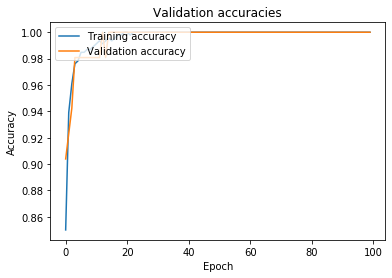

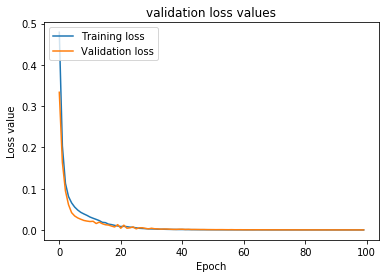

In [15]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()